# The Dataset:

## [Vertebral Column](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column)

# The Problem:

## Predict who has a spinal abnormality

# What do we have?

## Several measurements (6) taken by doctors that are biomechanical indicators of back/spine/pelvis stuff

# Why?

## If you can just take those measurements and tell someone they have a back abnormality and that they need x/y/z medications WITHOUT SEEING A DOCTOR they would save \$$

## Import some stuff that is useful for doing fancy data science:

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc
from sklearn.cross_validation import train_test_split

## And for fancy visualizations:

In [39]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)

## Now lets get the data:

In [41]:
vertebral_data = pd.read_csv("../data/vertebral_column_2_categories.dat", sep=" ",
                             names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade","outcome"])
vertebral_data.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade,outcome
300,50.68,6.46,35.00,44.22,116.59,-0.21,NO
301,89.01,26.08,69.02,62.94,111.48,6.06,NO
302,54.60,21.49,29.36,33.11,118.34,-1.47,NO
303,34.38,2.06,32.39,32.32,128.30,-3.37,NO
304,45.08,12.31,44.58,32.77,147.89,-8.94,NO
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO


In [42]:
features = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade"]
target = "outcome"
vertebral_data.outcome.value_counts()

AB    210
NO    100
Name: outcome, dtype: int64

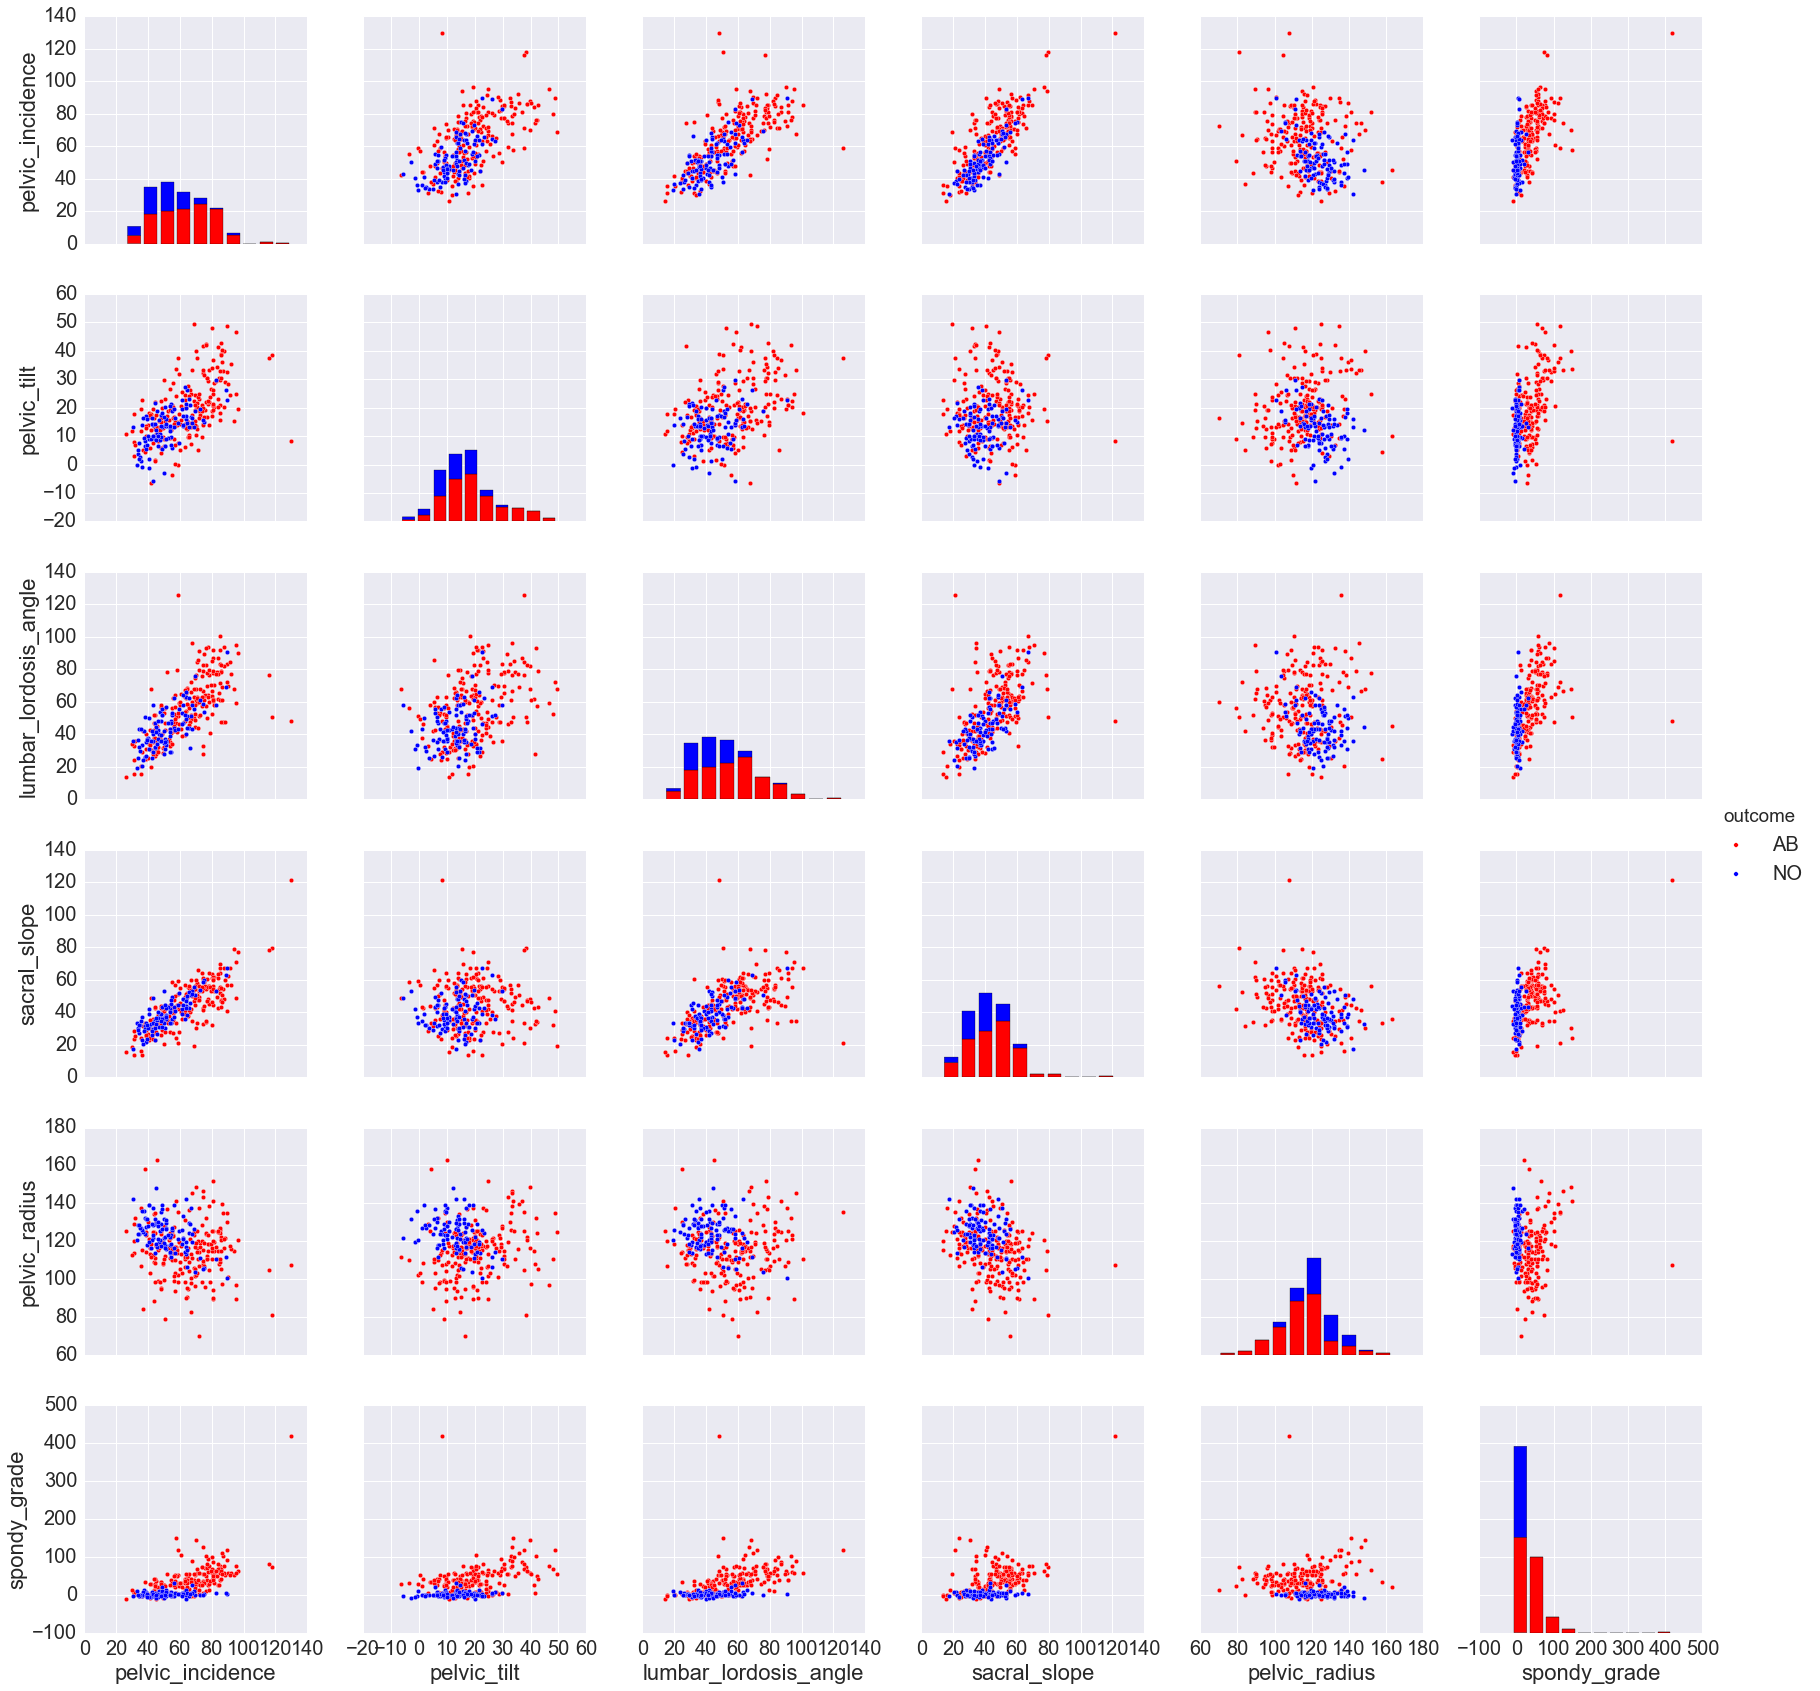

In [43]:
sns.pairplot(vertebral_data,hue="outcome",palette={"AB":"red","NO":"blue"},size=4)

In [54]:
X.shape

(310, 6)

In [55]:
X,y = vertebral_data[features],vertebral_data[target]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=241)

In [56]:
print y_train.value_counts()['AB'].astype(float)/y_train.value_counts().sum()
print y_test.value_counts()['AB'].astype(float)/y_test.value_counts().sum()

0.672811059908
0.688172043011


In [57]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
rand_forest = RandomForestClassifier(n_estimators=30,n_jobs=2,verbose=1)
rand_forest.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [61]:
log_reg_accuracy = accuracy_score(y_test,log_reg.predict(X_test))
rand_forest_accuracy = accuracy_score(y_test,rand_forest.predict(X_test))

[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [62]:
log_reg_accuracy

0.84946236559139787

In [63]:
rand_forest_accuracy

0.77419354838709675